# Predicting Land Use using machine learning

## What is classification?

Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.


#### Problem Definition
In our case, the problem we will be exploring is multiclass classification (a sample can be one of three labels).

In a statement,

Given physicochemicals parameters about a stream, can we predict the land use?

#### Data

Data obtained from collections carried out between October 2014 and March 2015 in streams of the Rio das Mortes sub-basin, on the outskirts of São João del Rei, MG - Brazil. The multiparameter probe YSI 556 MPS, U.S.A. was used. The data underwent logarithmic transformation for normalization.

#### Evaluation

If we can reach 80% accuracy at predicting what is the land use category to which that stream belongs during the proof of concept, we'll pursure this project.

#### Features

The following are the features we'll use to predict our target variable (land use category).

1. streaam : name of the stream
2. temperature : temperature in °C
3. conductivity   : conductivity in μS/cm-1
4. odc	: dissolved oxygen inmg/L
5. pH   : pH  in a 0:14	range
6. discharge : discharge in m3/s-1
7. target - land use category (2=Agricultural, 1=Urban, 0=Natural) (= the predicted attribute)



#### Preparing the tools

pandas for data analysis.
NumPy for numerical operations.
Matplotlib/seaborn for plotting or data visualization.
Scikit-Learn for machine learning modelling and evaluation.

# Preparing the tools
We're going to use Pandas, Matplotlib and NumPy for data analyisis and manipulation.

In [28]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load Data

Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of your .csv file. 

In [74]:
df = pd.read_csv("riodasmortes.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(115, 7)


## Exploratory data analysis (EDA)


In [75]:
# Let's check the top 5 rows of our dataframe
df.head()

,stream,temperature,conductivity,doc,pH,discharge,target
0,Oficina,1.273001,1.732394,0.828660,0.757396,-1.987163,1
1,Oficina,1.311118,1.633468,0.804139,0.733999,-1.723538,1
2,Oficina,1.327972,1.681241,0.705864,0.773786,-2.075721,1
3,Oficina,1.302331,1.612784,0.777427,0.762679,-1.661544,1
4,Oficina,1.342423,1.612784,0.662758,0.781755,-1.732822,1


In [76]:
# And the top 10
df.head(10)

,stream,temperature,conductivity,doc,pH,discharge,target
0,Oficina,1.273001,1.732394,0.828660,0.757396,-1.987163,1
1,Oficina,1.311118,1.633468,0.804139,0.733999,-1.723538,1
2,Oficina,1.327972,1.681241,0.705864,0.773786,-2.075721,1
3,Oficina,1.302331,1.612784,0.777427,0.762679,-1.661544,1
4,Oficina,1.342423,1.612784,0.662758,0.781755,-1.732822,1
5,Oficina,1.318063,1.568202,0.822168,0.788168,-1.804100,1
6,SCAetano,1.339451,1.322219,0.591065,0.705008,-2.767004,1
7,SCAetano,1.362671,1.079181,0.526339,0.549003,-2.671620,1
8,SCAetano,1.388634,1.230449,0.428135,0.724276,-2.749580,1
9,SCAetano,1.322012,1.322219,0.404834,0.699838,-2.806875,1


value_counts() allows you to show how many times each of the values of a categorical column appear.

In [77]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

1    46
0    39
2    30
Name: target, dtype: int64

An unbalanced target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples.

In [78]:
# Normalized value counts
df.target.value_counts(normalize=True)

1    0.40000
0    0.33913
2    0.26087
Name: target, dtype: float64

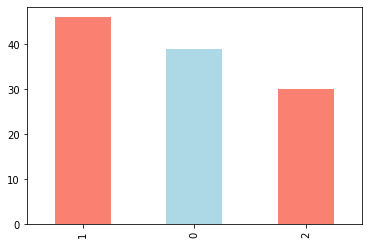

In [79]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

df.info() shows a quick insight to the number of missing values you have and what type of data your working with.

In our case, there are no missing values and the column 'stream' is not numerical in nature.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stream        115 non-null    object 
 1   temperature   115 non-null    float64
 2   conductivity  115 non-null    float64
 3   doc           115 non-null    float64
 4   pH            115 non-null    float64
 5   discharge     115 non-null    float64
 6   target        115 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 6.4+ KB


In [81]:
df.describe()

,temperature,conductivity,doc,pH,discharge,target
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1.337926,1.411121,0.629784,0.716517,-1.754893,0.921739
std,0.039628,0.480958,0.441406,0.222101,0.805205,0.774006
min,1.243534,0.477121,-0.602060,0.411620,-3.950782,0.000000
25%,1.311118,1.079181,0.621658,0.692379,-2.358689,0.000000
50%,1.333447,1.342423,0.768638,0.729165,-1.723538,1.000000
75%,1.367821,1.676670,0.835993,0.777789,-1.102373,2.000000
max,1.437275,2.527630,2.911690,2.735599,-0.082494,2.000000


## Land Use Frequency according to Dissolved Oxygen
Let's compare our target column with the doc column to know about how your independent variables interact with your dependent variables.

For the target column, 2 = Urban, 1 = Agricultural, 0 = Natural. 

In [82]:
df.doc.value_counts()

-0.602060    3
 0.828660    2
 0.668386    2
 0.894870    2
 0.844477    2
            ..
 0.206826    1
 0.079181    1
 0.318063    1
 0.012837    1
 0.937016    1
Name: doc, Length: 104, dtype: int64

In [83]:
# Compare target column with doc column
pd.crosstab(df.target, df.doc)

doc,-0.602060,-0.552842,-0.318759,-0.301030,-0.283997,-0.142668,-0.107905,-0.070581,-0.065502,-0.036212,...,0.890421,0.894870,0.915927,0.917506,0.919078,0.924279,0.936514,0.937016,1.494155,2.911690
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Making our crosstab visual

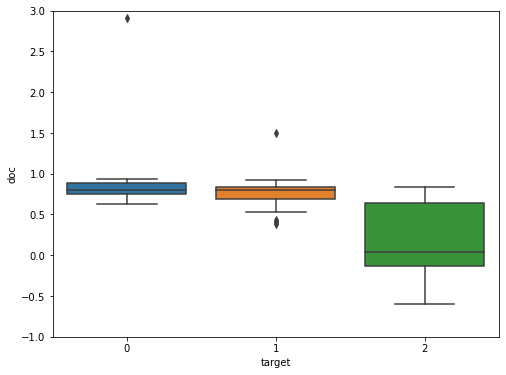

In [84]:
#box plot doc/target
var = 'target'
data = pd.concat([df['doc'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="doc", data=data)
fig.axis(ymin=-1, ymax=3);

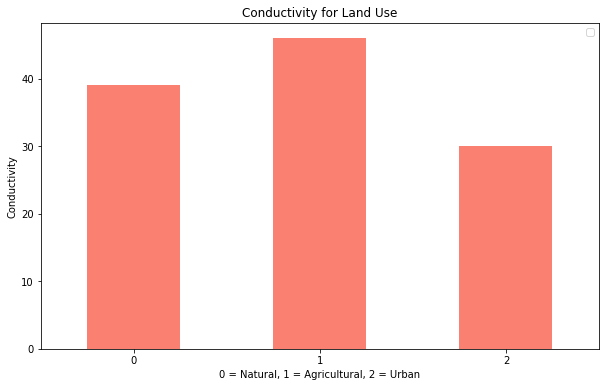

In [85]:
# Create a plot
pd.crosstab(df.target, df.conductivity.mean()).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue", "lightgreen"])

# Add some attributes to it
plt.title("Conductivity for Land Use")
plt.xlabel("0 = Natural, 1 = Agricultural, 2 = Urban")
plt.ylabel("Conductivity")
plt.legend([])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

In [86]:
df.head(0)

,stream,temperature,conductivity,doc,pH,discharge,target


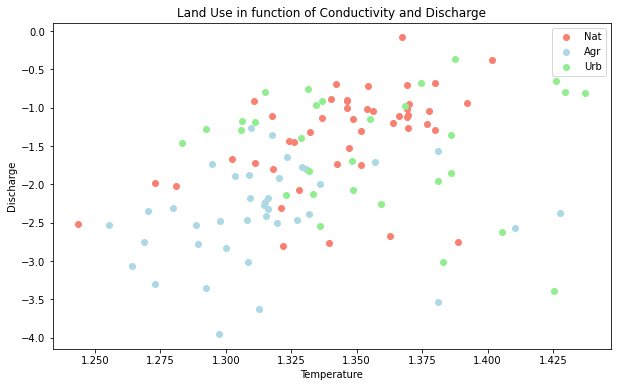

In [87]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.temperature[df.target==1], 
            df.discharge[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.temperature[df.target==0], 
            df.discharge[df.target==0], 
            c="lightblue") # axis always come as (x, y)
# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.temperature[df.target==2], 
            df.discharge[df.target==2], 
            c="lightgreen") # axis always come as (x, y)
# Add some helpful info
plt.title("Land Use in function of Conductivity and Discharge")
plt.xlabel("Temperature")
plt.legend(["Nat", "Agr", "Urb"])
plt.ylabel("Discharge");

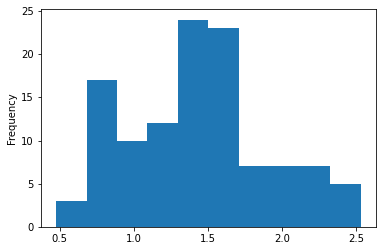

In [88]:
# Histogram for conductivity
df.conductivity.plot.hist();

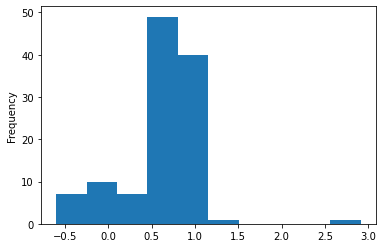

In [89]:
# Histogram for dissolved oxygen
df.doc.plot.hist();

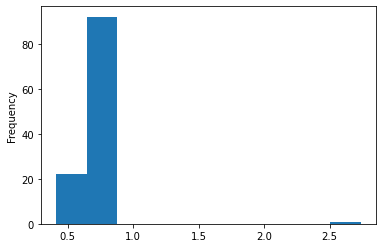

In [90]:
# Histogram for pH
df.pH.plot.hist();

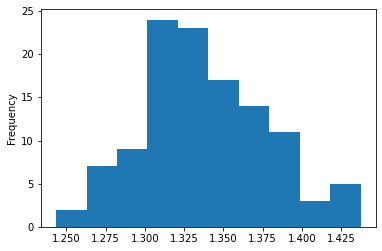

In [91]:
# Histogram for temperature
df.temperature.plot.hist();

## Correlation Matrix

In [92]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,temperature,conductivity,doc,pH,discharge,target
temperature,1.000000,0.082564,-0.294945,-0.021757,0.364473,0.403139
conductivity,0.082564,1.000000,-0.593390,0.391298,0.118184,0.756334
doc,-0.294945,-0.593390,1.000000,-0.089168,-0.316107,-0.606704
pH,-0.021757,0.391298,-0.089168,1.000000,0.034240,0.238335
discharge,0.364473,0.118184,-0.316107,0.034240,1.000000,0.450046
target,0.403139,0.756334,-0.606704,0.238335,0.450046,1.000000


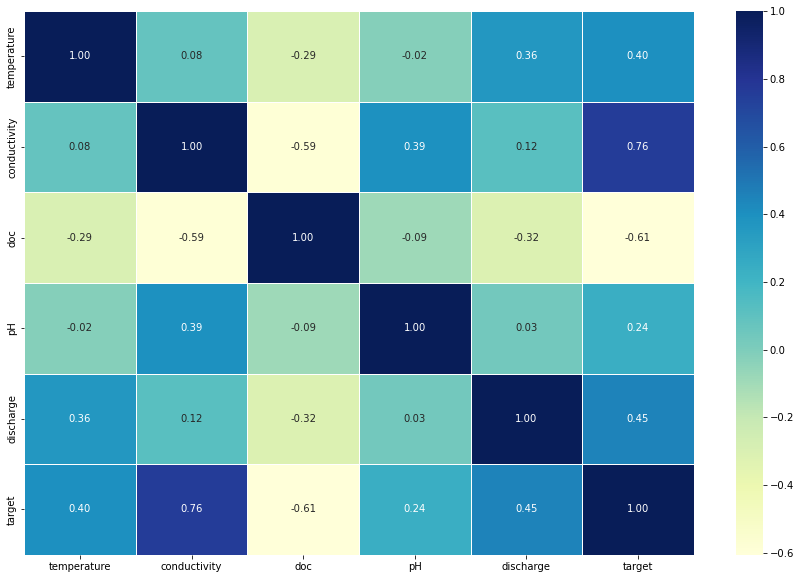

In [93]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [94]:
df.head().T

,0,1,2,3,4
stream,Oficina,Oficina,Oficina,Oficina,Oficina
temperature,1.273001,1.311118,1.327972,1.302331,1.342423
conductivity,1.732394,1.633468,1.681241,1.612784,1.612784
doc,0.82866,0.804139,0.705864,0.777427,0.662758
pH,0.757396,0.733999,0.773786,0.762679,0.781755
discharge,-1.987163,-1.723538,-2.075721,-1.661544,-1.732822
target,1,1,1,1,1


In [95]:
pd.api.types.is_string_dtype(df["stream"])

True

In [96]:
# Find the columns which contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

stream


In [97]:
# This will turn all of the string value into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stream        115 non-null    category
 1   temperature   115 non-null    float64 
 2   conductivity  115 non-null    float64 
 3   doc           115 non-null    float64 
 4   pH            115 non-null    float64 
 5   discharge     115 non-null    float64 
 6   target        115 non-null    int64   
dtypes: category(1), float64(5), int64(1)
memory usage: 6.3 KB


In [99]:
df.stream.cat.categories

Index(['Agua Limpa', 'Bichinho', 'CaptaBichinho', 'Carandai', 'Chafariz',
       'Lenheiros', 'Mangue', 'Mexerica', 'Mexerica_cab', 'Oficina', 'Prados',
       'Rit', 'SCAetano', 'Sumidouro', 'Tiradentes'],
      dtype='object')

In [100]:
df.stream.cat.codes

0      9
1      9
2      9
3      9
4      9
      ..
110    8
111    8
112    8
113    8
114    8
Length: 115, dtype: int8

In [101]:
df.isnull().sum()/len(df)

stream          0.0
temperature     0.0
conductivity    0.0
doc             0.0
pH              0.0
discharge       0.0
target          0.0
dtype: float64

In [102]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

stream


In [103]:
# Turn categorical variables into numbers 
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes+1

In [104]:
pd.Categorical(df["stream"]).codes+1

array([10, 10, 10, 10, 10, 10, 13, 13, 13, 13,  4,  4,  4,  4,  4,  4,  1,
        1,  1,  1,  1,  1, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
        6,  6,  6,  6,  6,  6, 15, 15, 15, 15, 15, 15,  2,  2,  2,  2,  2,
        2,  7,  7,  7,  7,  7,  3,  3,  3,  3,  3,  3,  5,  5,  5,  5, 14,
       14, 14, 14, 14, 14,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9], dtype=int8)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stream             115 non-null    int8   
 1   temperature        115 non-null    float64
 2   conductivity       115 non-null    float64
 3   doc                115 non-null    float64
 4   pH                 115 non-null    float64
 5   discharge          115 non-null    float64
 6   target             115 non-null    int64  
 7   stream_is_missing  115 non-null    bool   
dtypes: bool(1), float64(5), int64(1), int8(1)
memory usage: 5.7 KB


In [106]:
df.head().T

,0,1,2,3,4
stream,10,10,10,10,10
temperature,1.273001,1.311118,1.327972,1.302331,1.342423
conductivity,1.732394,1.633468,1.681241,1.612784,1.612784
doc,0.82866,0.804139,0.705864,0.777427,0.662758
pH,0.757396,0.733999,0.773786,0.762679,0.781755
discharge,-1.987163,-1.723538,-2.075721,-1.661544,-1.732822
target,1,1,1,1,1
stream_is_missing,False,False,False,False,False


In [107]:
df.isna().sum()

stream               0
temperature          0
conductivity         0
doc                  0
pH                   0
discharge            0
target               0
stream_is_missing    0
dtype: int64

In [108]:
df.head()

,stream,temperature,conductivity,doc,pH,discharge,target,stream_is_missing
0,10,1.273001,1.732394,0.828660,0.757396,-1.987163,1,False
1,10,1.311118,1.633468,0.804139,0.733999,-1.723538,1,False
2,10,1.327972,1.681241,0.705864,0.773786,-2.075721,1,False
3,10,1.302331,1.612784,0.777427,0.762679,-1.661544,1,False
4,10,1.342423,1.612784,0.662758,0.781755,-1.732822,1,False


## Modeling

In [109]:
df.head()

,stream,temperature,conductivity,doc,pH,discharge,target,stream_is_missing
0,10,1.273001,1.732394,0.828660,0.757396,-1.987163,1,False
1,10,1.311118,1.633468,0.804139,0.733999,-1.723538,1,False
2,10,1.327972,1.681241,0.705864,0.773786,-2.075721,1,False
3,10,1.302331,1.612784,0.777427,0.762679,-1.661544,1,False
4,10,1.342423,1.612784,0.662758,0.781755,-1.732822,1,False


In [110]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

In [111]:
# Independent variables (no target column)
X.head()

,stream,temperature,conductivity,doc,pH,discharge,stream_is_missing
0,10,1.273001,1.732394,0.828660,0.757396,-1.987163,False
1,10,1.311118,1.633468,0.804139,0.733999,-1.723538,False
2,10,1.327972,1.681241,0.705864,0.773786,-2.075721,False
3,10,1.302331,1.612784,0.777427,0.762679,-1.661544,False
4,10,1.342423,1.612784,0.662758,0.781755,-1.732822,False


In [112]:
# Targets
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [113]:
#Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2)

In [114]:
X_train.head()

,stream,temperature,conductivity,doc,pH,discharge,stream_is_missing
31,12,1.380934,1.963788,0.318063,0.737987,-1.958607,False
67,14,1.273001,1.732394,0.828660,0.756636,-3.300544,False
93,8,1.369401,1.176091,0.668386,0.687529,-1.013228,False
109,9,1.323458,0.903090,0.632457,0.451786,-1.638272,False
22,11,1.292256,2.307496,0.324282,0.790285,-1.283162,False


In [115]:
y_train, len(y_train)

(array([2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2,
        1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
        1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0,
        0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 2, 0]),
 92)

In [116]:
X_test.head()

,stream,temperature,conductivity,doc,pH,discharge,stream_is_missing
81,8,1.370143,1.255273,0.784617,0.748188,-0.954677,False
4,10,1.342423,1.612784,0.662758,0.781755,-1.732822,False
40,15,1.386142,2.290035,-0.017729,0.778151,-1.853872,False
69,14,1.268578,1.462398,0.863917,2.735599,-2.744727,False
10,4,1.243534,1.414973,0.752816,0.725095,-2.517126,False


In [117]:
y_test, len(y_test)

(array([1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0,
        1]),
 23)

In [118]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [119]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/Users/igorlima/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.9130434782608695,
 'Logistic Regression': 0.6521739130434783,
 'Random Forest': 0.9130434782608695}

# Model Comparison
Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

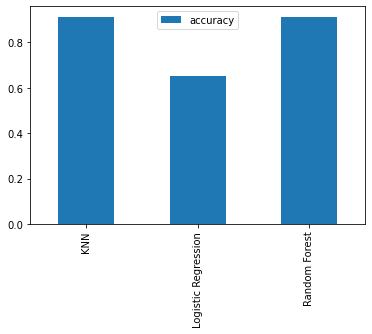

In [120]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [121]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [122]:
train_scores

[1.0,
 0.9891304347826086,
 0.9891304347826086,
 0.967391304347826,
 0.967391304347826,
 0.9456521739130435,
 0.9130434782608695,
 0.8369565217391305,
 0.7934782608695652,
 0.782608695652174,
 0.7391304347826086,
 0.7065217391304348,
 0.6956521739130435,
 0.6739130434782609,
 0.6630434782608695,
 0.6739130434782609,
 0.6413043478260869,
 0.6847826086956522,
 0.6847826086956522,
 0.6847826086956522]

In [123]:
test_scores

[1.0,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.8260869565217391,
 0.6956521739130435,
 0.6086956521739131,
 0.5652173913043478,
 0.5652173913043478,
 0.43478260869565216,
 0.5217391304347826,
 0.5217391304347826,
 0.4782608695652174,
 0.4782608695652174,
 0.5217391304347826,
 0.4782608695652174,
 0.5217391304347826,
 0.5217391304347826,
 0.5217391304347826]

Maximum KNN score on the test data: 100.00%


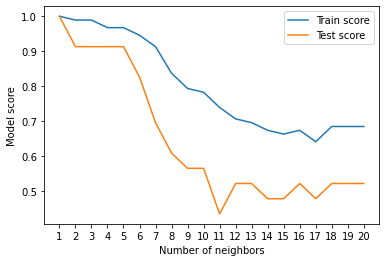

In [124]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


Looking at the graph, n_neighbors = 1 seems best. In this case, the object is simply assigned to the class of that single nearest neighbor. Because of this, we'll discard KNN and focus on the other two.

We've tuned KNN by hand but let's see how we can LogisticsRegression and RandomForestClassifier using RandomizedSearchCV.

Instead of us having to manually try different hyperparameters by hand, RandomizedSearchCV tries a number of different combinations, evaluates them and saves the best.

## Tuning models with with RandomizedSearchCV
Reading the Scikit-Learn documentation for 
* LogisticRegression(), we find there's a number of different hyperparameters we can tune.

* The same for RandomForestClassifier()

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [125]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use RandomizedSearchCV to try and tune our LogisticRegression model.

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones

In [126]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [127]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [128]:
rs_log_reg.score(X_test, y_test)

0.7391304347826086

Now we've tuned LogisticRegression using RandomizedSearchCV, we'll do the same for RandomForestClassifier.

In [130]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=40,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [141]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [142]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8695652173913043

Tuning the hyperparameters for each model saw a slight performance boost in both the RandomForestClassifier and LogisticRegression.

This is akin to tuning the settings on your oven and getting it to cook your favourite dish just right.

But since LogisticRegression is pulling out in front, we'll try tuning it further with GridSearchCV.

## Tuning a model with GridSearchCV
The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.

In short:

RandomizedSearchCV - tries n_iter combinations of hyperparameters and saves the best.
GridSearchCV - tries every single combination of hyperparameters and saves the best.
Let's see it in action.

In [133]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [134]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [135]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.7391304347826086

### Result

In [143]:
model_scores

{'KNN': 0.9130434782608695,
 'Logistic Regression': 0.6521739130434783,
 'Random Forest': 0.9130434782608695}


## Evaluating a classification model, beyond accuracy

* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

In [144]:
# Make preidctions on test data
y_preds = rs_rf.predict(X_test)

In [145]:
y_test

array([1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0,
       1])

In [146]:
y_preds

array([1, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0,
       0])

## Confusion matrix
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using confusion_matrix() and passing it the true labels and predicted labels.

In [147]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[9 0 0]
 [3 6 0]
 [0 0 5]]


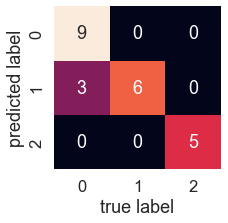

In [148]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

There are 2 occasaions where the model predicted 1 when it should've been 0 and 1 occasion where the model predicted 1 instead of 2.

## Classification report

A classification report will also give us information of the precision and recall of our model for each class.

In [149]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.67      0.80         9
           2       1.00      1.00      1.00         5

    accuracy                           0.87        23
   macro avg       0.92      0.89      0.89        23
weighted avg       0.90      0.87      0.87        23



* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

## Feature importance
Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".

Since we're using LogisticRegression, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the coef_ attribute. Looking at the Scikit-Learn documentation for LogisticRegression, the coef_ attribute is the coefficient of the features in the decision function.

We can access the coef_ attribute after we've fit an instance of LogisticRegression.

In [150]:
# Fit an instance of LogisticRegression (taken from above)
clf = RandomForestClassifier(n_estimators = 310)
clf.fit(X_train, y_train);

In [151]:
# Check coef_
clf.feature_importances_

array([0.08780872, 0.13605731, 0.32172661, 0.15771534, 0.13048088,
       0.16621114, 0.        ])

In [152]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.feature_importances_)))
features_dict

{'stream': 0.08780872106842548,
 'temperature': 0.13605730787504394,
 'conductivity': 0.3217266085148772,
 'doc': 0.15771534228304937,
 'pH': 0.1304808812601955,
 'discharge': 0.16621113899840856,
 'target': 0.0}

Now we've match the feature coefficients to different features, let's visualize them.

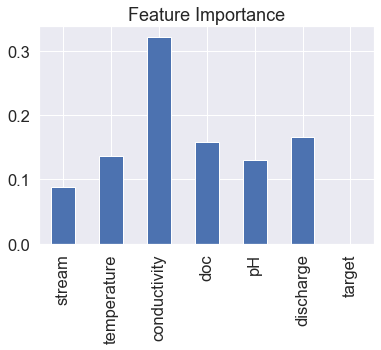

In [153]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [154]:
import pickle

# Save the model to file 
pickle.dump(clf, open("RandomForestClassifier_land_use_clssification.pkl", "wb"))